# PROBABILITY THEORY

    BSC (HONS) Mathematics Department
    BSC (HONS) Financial Mathematics Department
    BSC (HONS) Computer Science with Data Analysis Department


## Instructor

    Dr. Salem Ameen
    Mathematics Department
    School of Science, Engineering and Environment
    The University of Salford 
    
    
## Lecture 4

______________________________________________________________________________

Many thanks to [USSanDiego](https://www.ucsd.edu/), [Alon Orlitsky](http://alon.ucsd.edu/) , [Yoav Freund](https://scholar.google.com/citations?user=NFdG-GMAAAAJ&hl=en) for sharing many of the codes.

______________________________________________________________________________
______________________________________________________________________________


## Conditional Probability 

Oftentimes it is advantageous to infer the probability of certain events conditioned on other events. Say you want to estimate the probability that it will rain on a particular day. There are copious number of factors that affect rain on a particular day, but [certain clouds are good indicators of rains](https://www.nationalgeographic.com/science/earth/earths-atmosphere/clouds/). Then the question is how likely are clouds a precursor to rains? These types of problems are called [statistical classification](https://en.wikipedia.org/wiki/Statistical_classification), and concepts such as conditional probability and Bayes rule play an important role in its solution.

Dice, coins and cards are useful examples which we can use to understand the fundamental concepts of probability. There are even more interesting real world examples where we can apply these principles to. Let us analyze the [student alcohol consumption](https://www.kaggle.com/kanncaa1/does-alcohol-affect-success/data) dataset and see if we can infer any information regarding a student's performance relative to the time they spend studying. 

<span style="color:red">NOTE:</span> Before continuing, please download the dataset and add it to the folder where this notebook resides.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

The dataset consists of two parts, `student-por.csv` and `student-mat.csv`, represents the students' performance in Portuguese and Math courses, respectively. We will consider the scores in the Portuguese courses, and leave the math courses optionally to you. 

In [2]:
data_por = pd.read_csv("student-por.csv")

Of the dataset's [various attributes](https://www.nationalgeographic.com/science/earth/earths-atmosphere/clouds/), we will use the following two
- `G3` - final grade related with the course subject, Math or Portuguese (numeric: from 0 to 20, output target)  
- `studytime` - weekly study time (numeric: 1 : < 2 hours, 2 : 2 to 5 hours, 3 : 5 to 10 hours, or 4 : > 10 hours)  

In [3]:
attributes = ["G3","studytime"]
data_por = data_por[attributes]

We are interested in the relationship between study-time and grade performance, but to start, let us view each attribute individually. 

The probability that a student's study-time falls in an interval can be approximated by

$${P(\text{study interval}) = \frac{\text{Number of students with this study interval}}{Total\ number\ of\ students}}$$

This is an emperical estimate, and in later lectures we will reason why this is a valid assumption.

Text(0.5, 0, 'Study Interval')

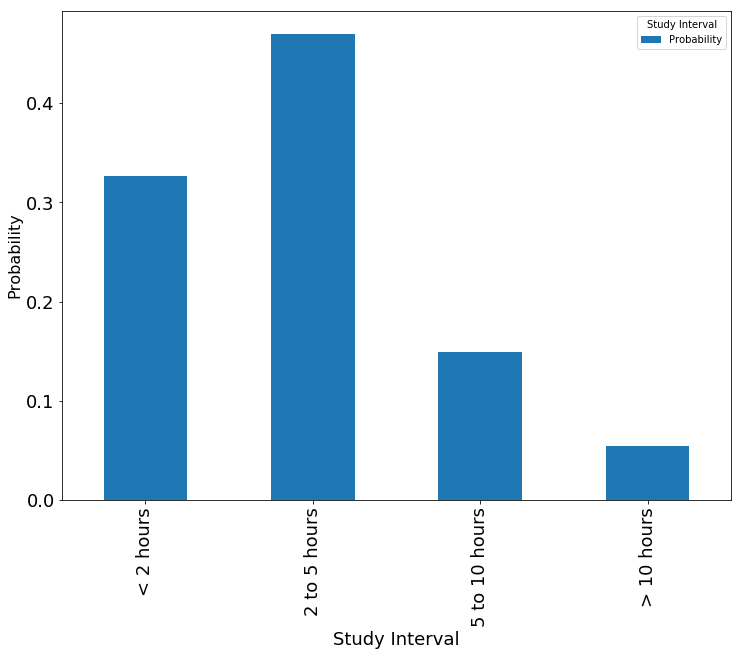

In [4]:
data_temp = data_por["studytime"].value_counts()
P_studytime = pd.DataFrame((data_temp/data_temp.sum()).sort_index())
P_studytime.index = ["< 2 hours","2 to 5 hours","5 to 10 hours","> 10 hours"]
P_studytime.columns = ["Probability"]
P_studytime.columns.name = "Study Interval"

P_studytime.plot.bar(figsize=(12,9),fontsize=18)
plt.ylabel("Probability",fontsize=16)
plt.xlabel("Study Interval",fontsize=18)

Note that the largest number of students studied between two and five hours, and the smallest studied over 10 hours. 

Let us call scores of at least 15 "high". The probability of a student getting a high score can be approximated by

$$P(\text{high score}) = \frac{\text{Number of students with high scores}}{\text{Total number of students}}$$

Score  Probability
Low       0.798151
High      0.201849


Text(0, 0.5, 'Probability')

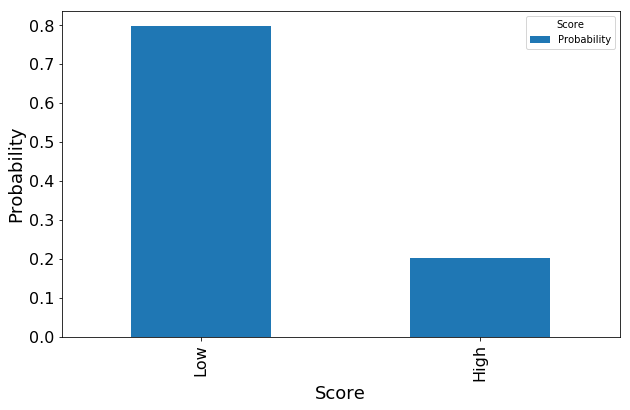

In [5]:
data_temp = (data_por["G3"]>=15).value_counts()
P_score15_p = pd.DataFrame(data_temp/data_temp.sum())
P_score15_p.index = ["Low","High"]
P_score15_p.columns = ["Probability"]
P_score15_p.columns.name = "Score"
print(P_score15_p)
P_score15_p.plot.bar(figsize=(10,6),fontsize=16)
plt.xlabel("Score",fontsize=18)
plt.ylabel("Probability",fontsize=18)

Proceeding to more interesting observations, suppose we want to find the probability of the various study-intervals when the student scored high. By conditional probability, this can be calculated by:

$$P(\text{study interval}\ |\ \text{highscore})=\frac{\text{Number of students with study interval AND highscore}}{\text{Total number of students with highscore}}$$

Probability of study interval given that the student gets a highscore:


Text(0, 0.5, 'Probability')

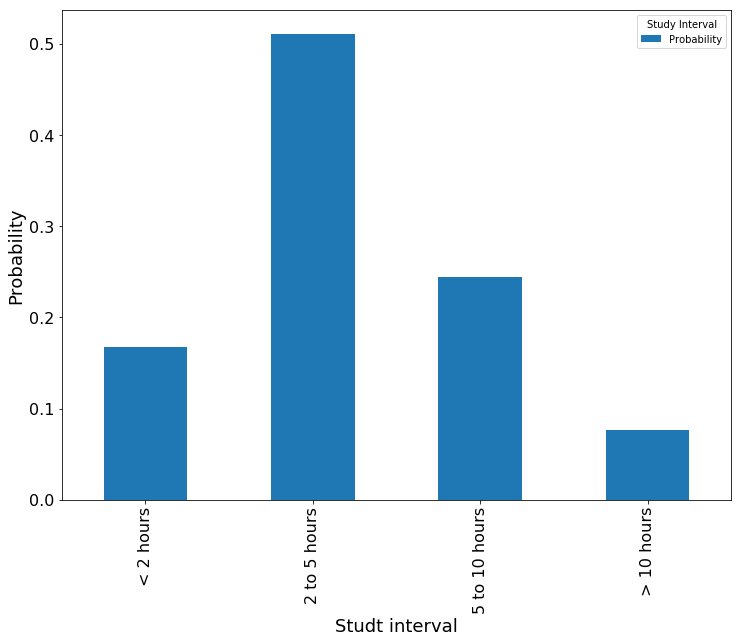

In [6]:
score = 15
data_temp = data_por.loc[data_por["G3"]>=score,"studytime"]
P_T_given_score15= pd.DataFrame((data_temp.value_counts()/data_temp.shape[0]).sort_index())
P_T_given_score15.index = ["< 2 hours","2 to 5 hours","5 to 10 hours","> 10 hours"]
P_T_given_score15.columns = ["Probability"]
print("Probability of study interval given that the student gets a highscore:")
P_T_given_score15.columns.name="Study Interval"
P_T_given_score15.plot.bar(figsize=(12,9),fontsize=16)
plt.xlabel("Studt interval",fontsize=18)
plt.ylabel("Probability",fontsize=18)